In [96]:
# importing all relevant libraries
import pandas as pd 
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [97]:
#conversion of .dat files to .csv


#these are the paths to all files 
data_format= 'dat' 
file_user='C:/Users/Razi/Documents/semester 6/Data Science/Project related/ml-1m/users.dat'
file_movie='C:/Users/Razi/Documents/semester 6/Data Science/Project related/ml-1m/movies.dat'
file_rating='C:/Users/Razi/Documents/semester 6/Data Science/Project related/ml-1m/ratings.dat'



job={0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
     5: "customer service", 6: "doctor/health care",7: "executive/managerial", 8: "farmer", 9: "homemaker", 
     10: "K-12 student", 11: "lawyer",12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 
     16: "self-employed",17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }
year={ 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"}


user_f='users.csv'
movie_f='movies.csv'
rating_f='ratings.csv'











In [75]:


ratings = pd.read_csv(os.path.join(data_format, file_rating), sep='::', engine='python', encoding='latin-1',
                      names=['user_id', 'movie_id', 'rating', 'timestamp'])



user_max=ratings['user_id'].drop_duplicates().max()
movie_max=ratings['movie_id'].drop_duplicates().max()


ratings['user_emb_id'] = ratings['user_id'] - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1


print('the total number of ratings are',len(ratings))


#this is the maximum  number of users

ratings.to_csv(rating_f, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])

print ('the file is saved in ', rating_f)

ratings.isnull().values.any()
#there are no null values

ratings.head()



the total number of ratings are 1000209
the file is saved in  ratings.csv


,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354


In [98]:
users = pd.read_csv(os.path.join(data_format, file_user), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age','occupation', 'zipcode'])


users['occ_desc']=users['occupation'].apply(lambda x: job[x])
users['age_desc']=users['age'].apply(lambda x: year[x])




print ( max_userid, 'total users.')


# Save into users.csv
users.to_csv(user_f, sep='\t', header=True, encoding='latin-1',columns=['user_id', 'gender', 'age', 
                      'occupation', 'zipcode', 'age_desc', 'occ_desc'])


print ('the file is saved in', user_f)

users.isnull().values.any()
#there are no null values
users.head()

6040 total users.
the file is saved in users.csv


,user_id,gender,age,occupation,zipcode,occ_desc,age_desc
0,1,F,1,10,48067,K-12 student,Under 18
1,2,M,56,16,70072,self-employed,56+
2,3,M,25,15,55117,scientist,25-34
3,4,M,45,7,02460,executive/managerial,45-49
4,5,M,25,20,55455,writer,25-34


In [92]:
# Read the Movies File
movies = pd.read_csv(os.path.join(data_format,file_movie), sep='::', engine='python', encoding='latin-1',names=['movie_id', 'title', 'genres'])

print('the total number of movies are', max_movieid)


# Save into movies.csv
movies.to_csv(movie_f, sep='\t', header=True, columns=['movie_id', 'title', 'genres'])
print ('file is saved in', MOVIES_CSV_FILE)
movies.isnull().values.any()
#there are no null values


movies.head()


the total number of movies are 3952
file is saved in movies.csv


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [99]:

movies.info()
print('\n')
users.info()
print('\n')
ratings.info()
print('\n')
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
occ_desc      6040 non-null object
age_desc      6040 non-null object
dtypes: int64(3), object(4)
memory usage: 330.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
user_id         1000209 non-null int64
movie_id        1000209 non-null int64
rating          1000209 non-null int64
timestamp       1000209 non-null int64
user_emb_id     1000209 non-null int64
movie_emb_id    1000209 non-null i

,user_id,gender,age,occupation,zipcode,occ_desc,age_desc
0,1,F,1,10,48067,K-12 student,Under 18
1,2,M,56,16,70072,self-employed,56+
2,3,M,25,15,55117,scientist,25-34
3,4,M,45,7,02460,executive/managerial,45-49
4,5,M,25,20,55455,writer,25-34


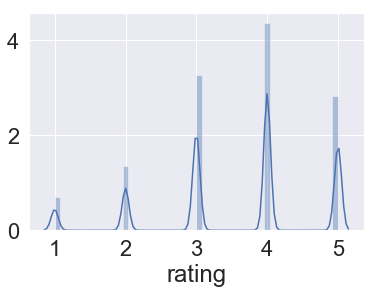

In [88]:
ratings['rating'].describe()
sns.set_style('dark')

sns.set(font_scale=2.0)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))
# here we can see that most movies have gotten the rating of 4 and rating 1 is given to only a few 

In [111]:
print("now lets look at the most prefered genres")


category_labels = set()
for s in movies['genres'].str.split('|').values:
    category_labels = category_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
   
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

now lets look at the most prefered genres


[["['Drama']", 843],
 ["['Comedy']", 521],
 ["['Horror']", 178],
 ["['Comedy', 'Drama']", 162],
 ["['Comedy', 'Romance']", 142]]

In [104]:

print('here we have the top 20 movies with highest ratings')

#we need to look at all the data sets so we combine them all to look at the most prefered movies
our_data = pd.merge(pd.merge(movies, ratings),users)


our_data[['title','genres','rating']].sort_values('rating', ascending=False).head(20)


here we have the top 20 movies with highest ratings


,title,genres,rating
0,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']",5
489283,American Beauty (1999),"['Comedy', 'Drama']",5
489259,Election (1999),['Comedy'],5
489257,"Matrix, The (1999)","['Action', 'Sci-Fi', 'Thriller']",5
489256,Dead Ringers (1988),"['Drama', 'Thriller']",5
489237,Rushmore (1998),['Comedy'],5
489236,"Simple Plan, A (1998)","['Crime', 'Thriller']",5
489226,Hands on a Hard Body (1996),['Documentary'],5
489224,Pleasantville (1998),['Comedy'],5
489212,Say Anything... (1989),"['Comedy', 'Drama', 'Romance']",5


In [112]:
#here we will be using cosine similiarity

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]


array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [145]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def recommendation(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]
    
    
    



    

In [146]:
print("movies recommended to people who liked 'Four Rooms'\n ")

recommendation('Four Rooms (1995)').head(10)

movies recommended to people who liked 'Four Rooms'
 


22               Assassins (1995)
101          Unforgettable (1996)
130                   Jade (1995)
181           Mute Witness (1994)
188                   Safe (1995)
198    Tie That Binds, The (1995)
223              Dream Man (1995)
237               Hideaway (1995)
288          Poison Ivy II (1995)
316          Shallow Grave (1994)
Name: title, dtype: object

In [147]:

print("movies recommended to people who liked 'Othello'\n ")

recommendation('Othello (1995)').head(10)

movies recommended to people who liked 'Othello'
 


25                                       Othello (1995)
26                                  Now and Then (1995)
29    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                               Dangerous Minds (1995)
35                              Dead Man Walking (1995)
39                      Cry, the Beloved Country (1995)
42                                   Restoration (1995)
52                                      Lamerica (1994)
54                                       Georgia (1995)
56                         Home for the Holidays (1995)
Name: title, dtype: object

In [148]:
print("movies recommended to people who liked 'It Takes Two'\n ")

recommendation('It Takes Two (1995)').head(10)

movies recommended to people who liked 'It Takes Two'
 


18                 Ace Ventura: When Nature Calls (1995)
37                                   It Takes Two (1995)
51                               Mighty Aphrodite (1995)
62     Don't Be a Menace to South Central While Drink...
64                                       Bio-Dome (1996)
68                                         Friday (1995)
87                                    Black Sheep (1996)
94                         In the Bleak Midwinter (1995)
99                                  Bottle Rocket (1996)
100                                     Mr. Wrong (1996)
Name: title, dtype: object

In [149]:

print("movies recommended to people who liked 'Billy Madison'\n ")


recommendation('Billy Madison (1995)').head(10)

movies recommended to people who liked 'Billy Madison'
 


18                 Ace Ventura: When Nature Calls (1995)
37                                   It Takes Two (1995)
51                               Mighty Aphrodite (1995)
62     Don't Be a Menace to South Central While Drink...
64                                       Bio-Dome (1996)
68                                         Friday (1995)
87                                    Black Sheep (1996)
94                         In the Bleak Midwinter (1995)
99                                  Bottle Rocket (1996)
100                                     Mr. Wrong (1996)
Name: title, dtype: object

In [150]:
print("movies recommended to people who liked 'clerks'\n ")

recommendation('Clerks (1994)').head(10)

movies recommended to people who liked 'clerks'
 


18                 Ace Ventura: When Nature Calls (1995)
37                                   It Takes Two (1995)
51                               Mighty Aphrodite (1995)
62     Don't Be a Menace to South Central While Drink...
64                                       Bio-Dome (1996)
68                                         Friday (1995)
87                                    Black Sheep (1996)
94                         In the Bleak Midwinter (1995)
99                                  Bottle Rocket (1996)
100                                     Mr. Wrong (1996)
Name: title, dtype: object